In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import math 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=[DeprecationWarning, FutureWarning])



AssertionError: category must be a class

In [2]:
dataset=pd.read_csv("breast_cancer_diagnosis.csv")

In [3]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
dataset.shape

(569, 33)

In [5]:
dataset.drop('id', axis=1, inplace=True)
dataset.drop('Unnamed: 32',axis=1, inplace=True)

In [6]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
label_encode_x=LabelEncoder()

In [8]:
dataset['diagnosis'] = label_encode_x.fit_transform(dataset['diagnosis'])   #This will convert M->1 ,B->0

In [9]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
print("This data set has {} feautres and {} samples",dataset.shape[1],dataset.shape[0])

This data set has {} feautres and {} samples 31 569


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
dataset.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
dtype: int64

In [13]:
display(dataset.describe())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


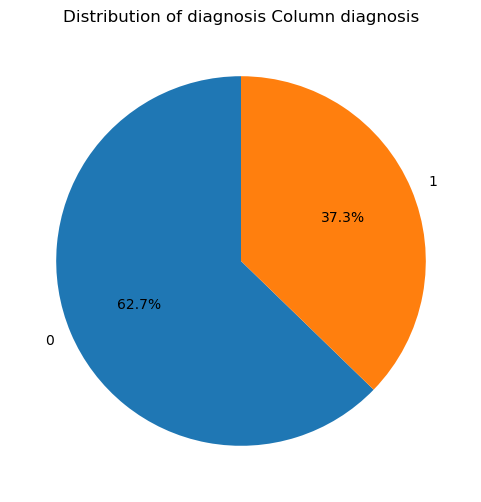

In [14]:
target = 'diagnosis'
value_counts = dataset[target].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diagnosis Column {}'.format(target))
plt.show()
#1 represent malignant (cancerous) 0 represent non cancerous

In [15]:
#Checking number of unique rows in each feature
#To check that no Categorical feature is still present 

features = [i for i in dataset.columns.values if i not in [target]]
nu = dataset[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(dataset[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Datset has 30 numerical & 0 categorical features.


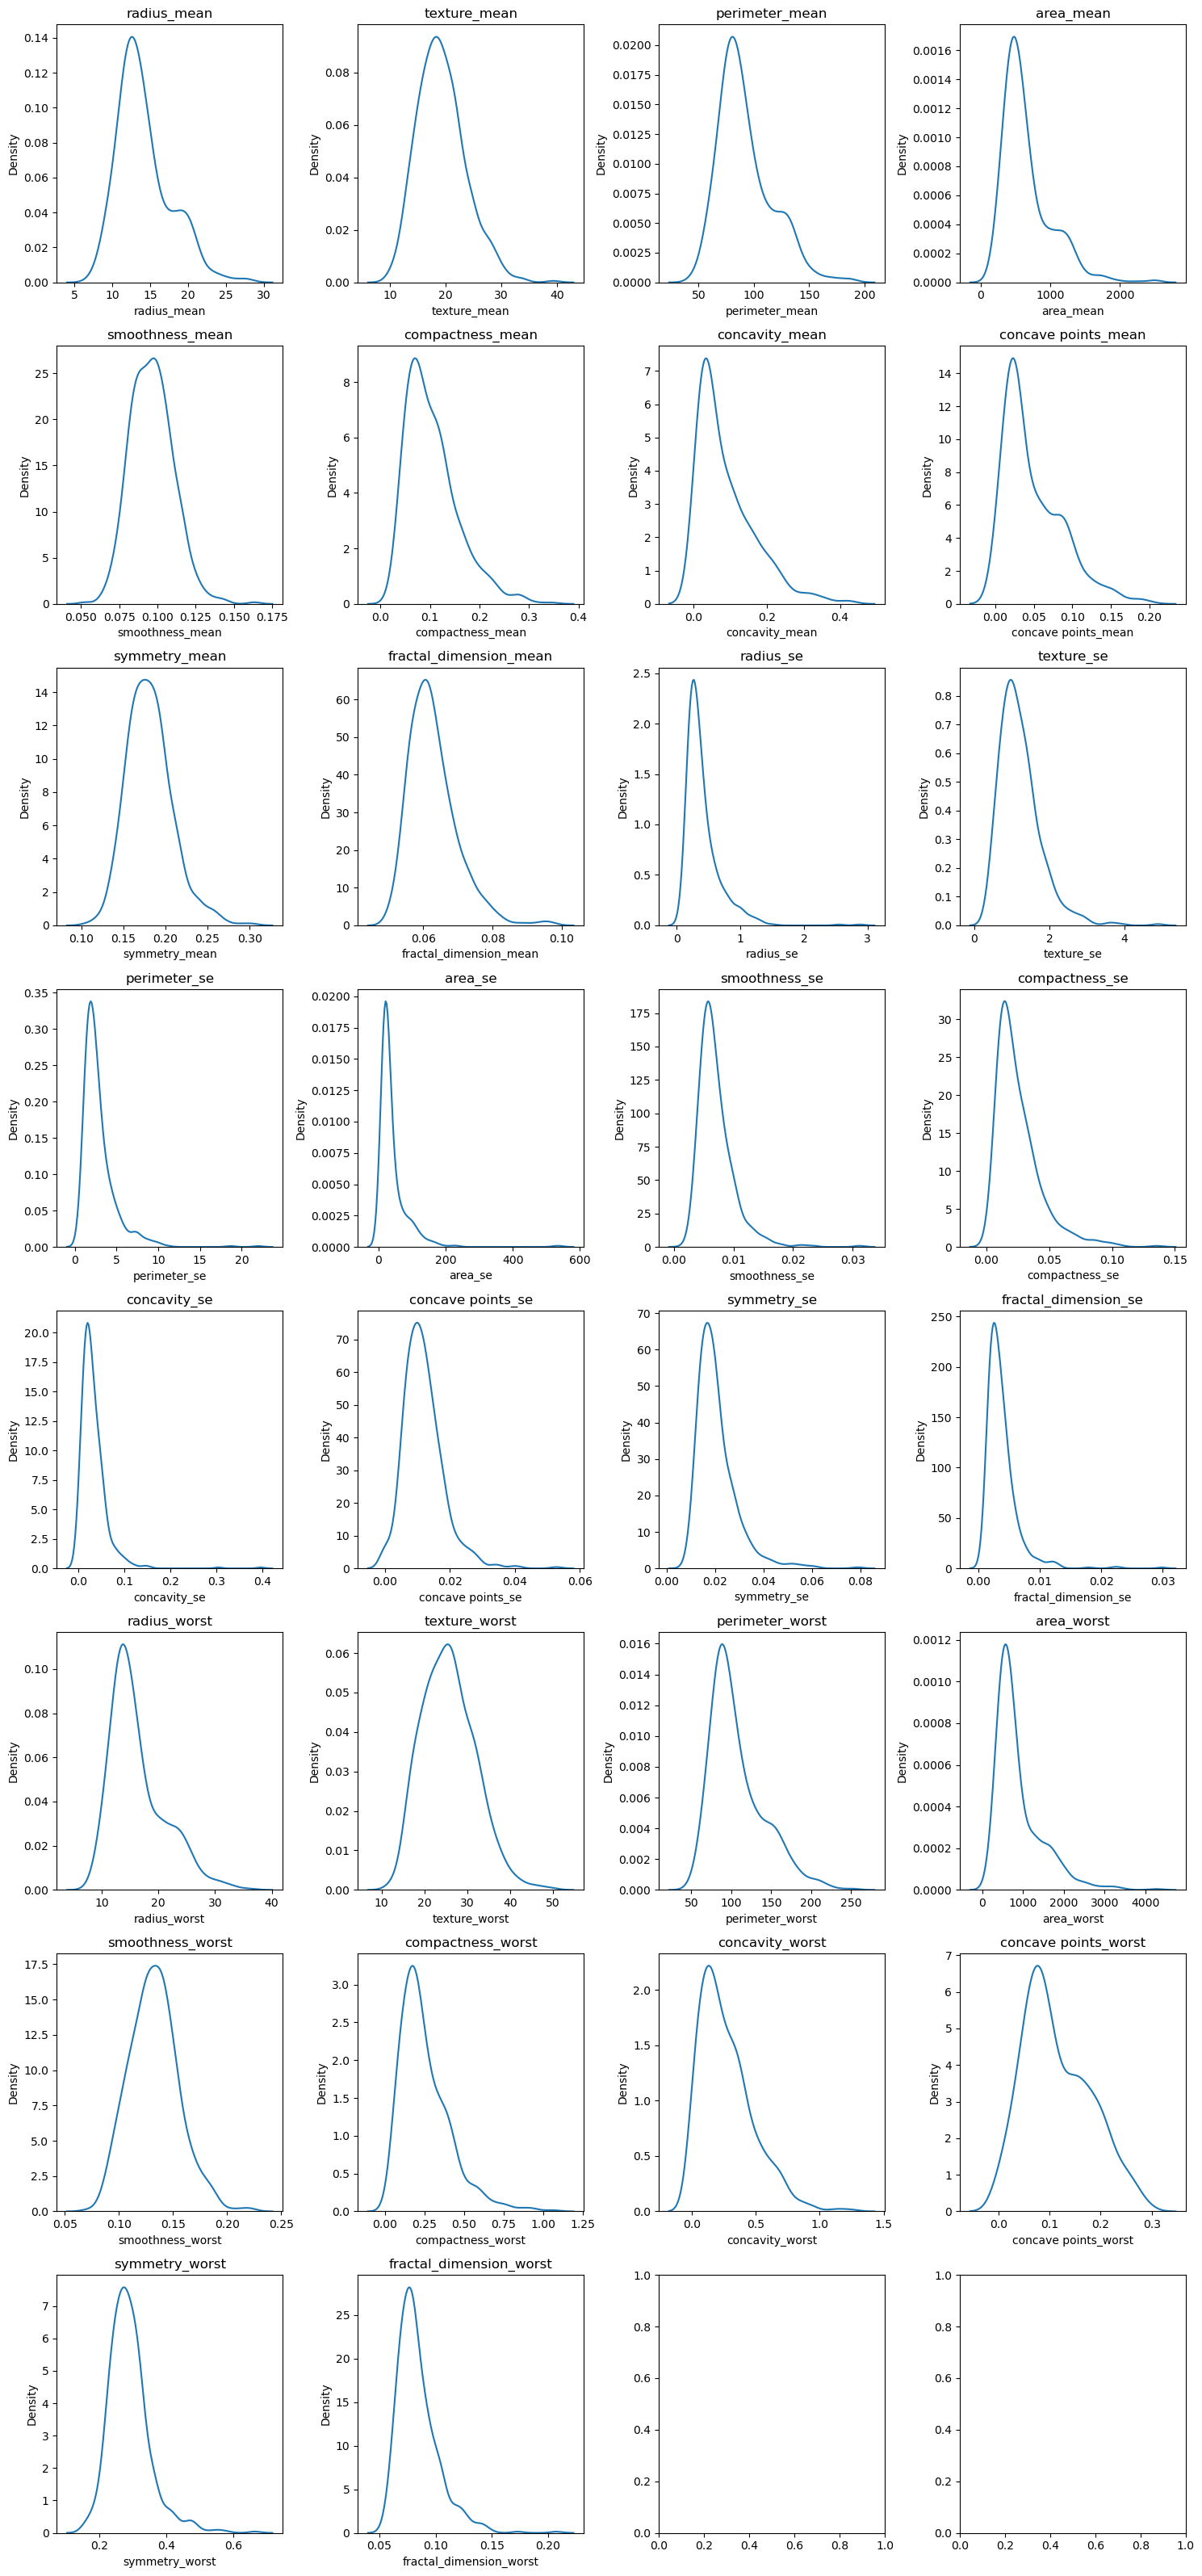

In [16]:
features = dataset.columns[1:]


n_cols = 4
n_rows = -(-len(features) // n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = [axes]
for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    sns.kdeplot(dataset[feature], ax=axes[row][col])
    axes[row][col].set_title(feature)
plt.tight_layout()
plt.show()

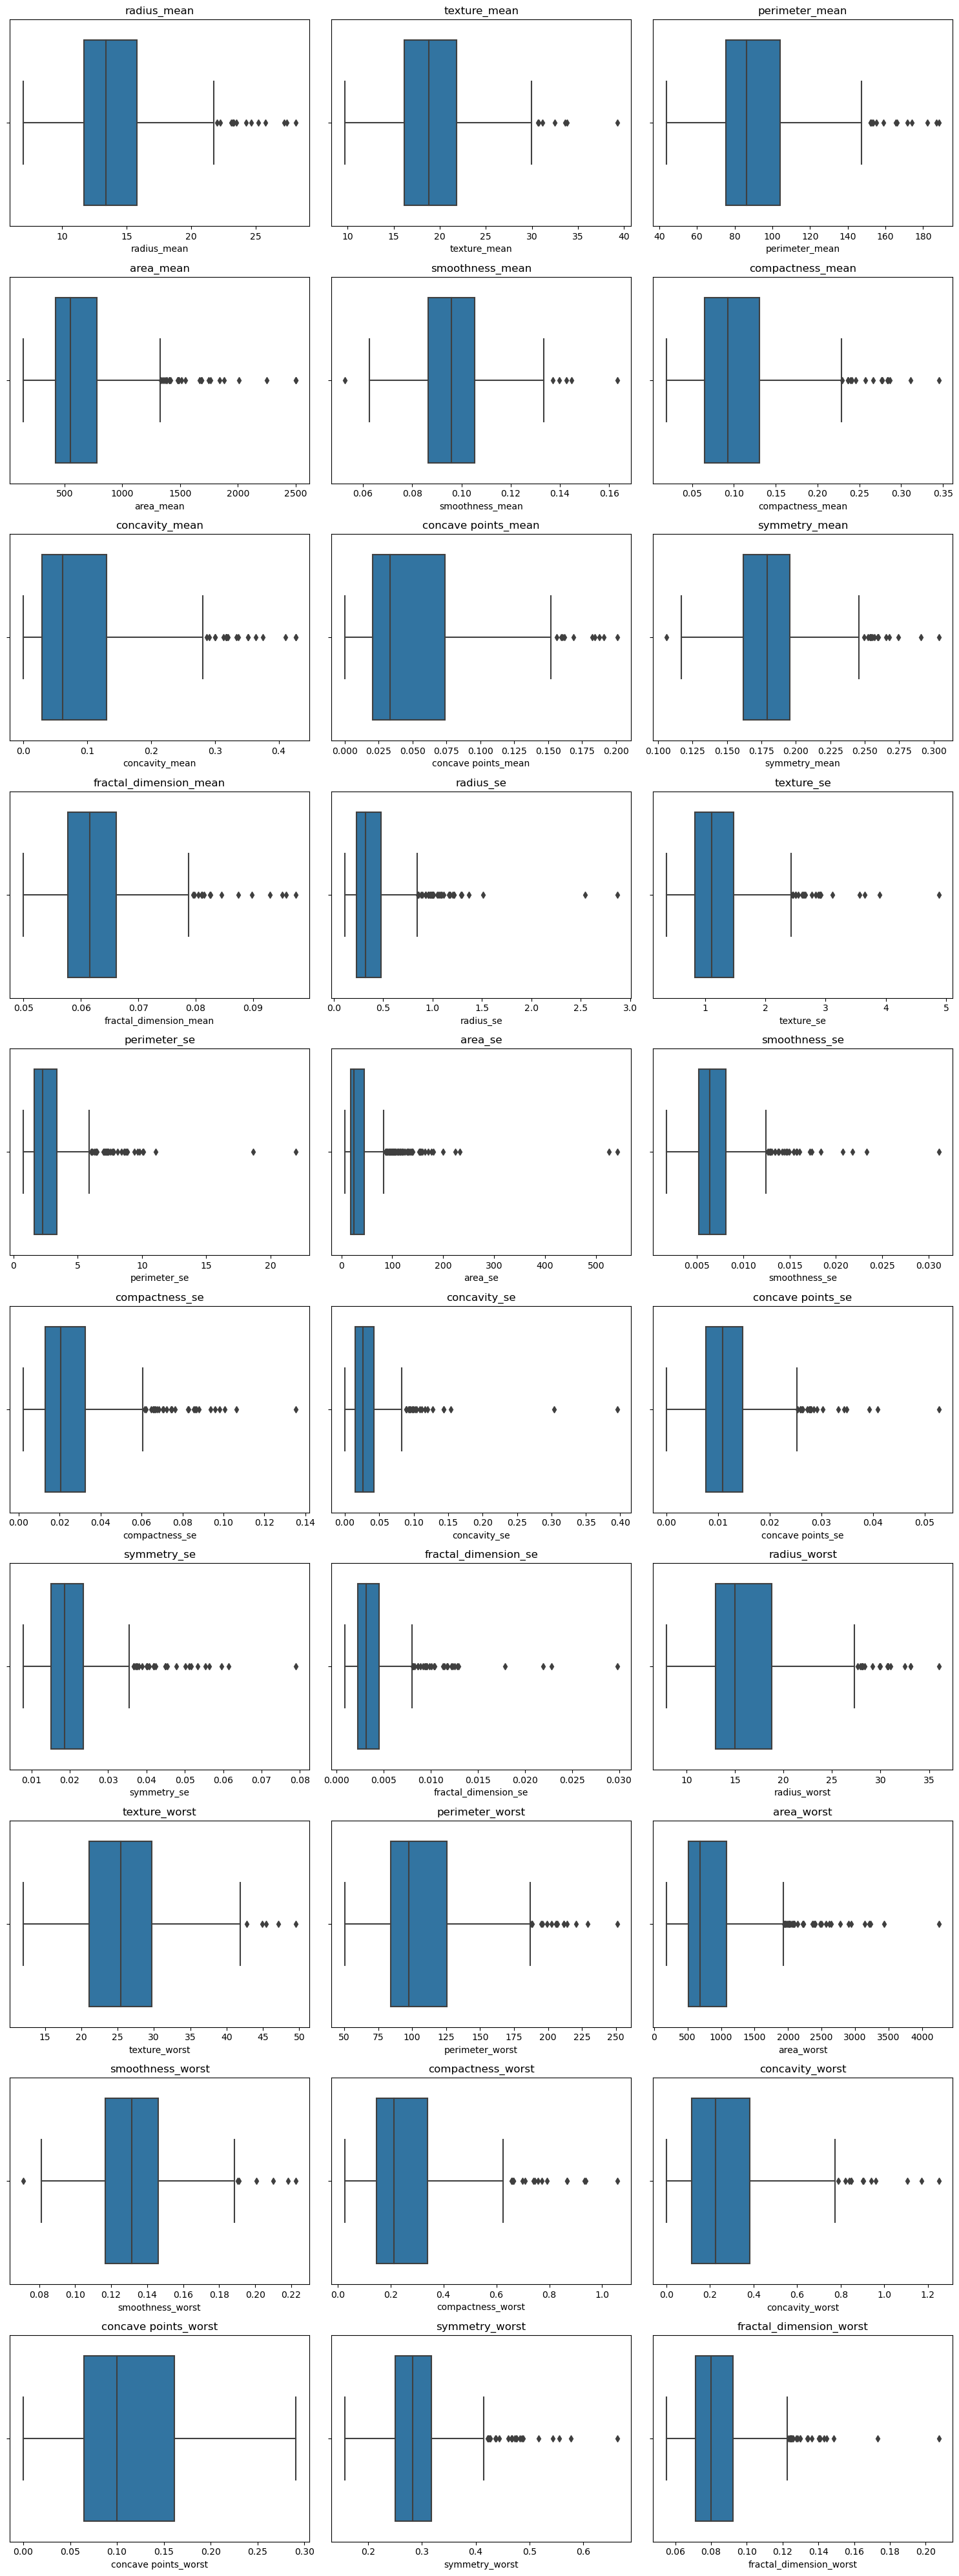

In [17]:
features = dataset.columns[1:]

n_cols = 3  
n_rows = -(-len(features) // n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

if n_rows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=dataset[feature], ax=axes[row][col])
    axes[row][col].set_title(feature)

plt.tight_layout()
plt.show()

In [18]:
#Dropping Duplicates to remove redundency 
original_rows = dataset.shape[0]
dataset.drop_duplicates(inplace=True)
rows_dropped = original_rows - dataset.shape[0]
print("Number of duplicate rows dropped:", rows_dropped)


Number of duplicate rows dropped: 0


In [19]:
# Check for empty values in the dataset
empty_values = dataset.isna().sum()
print("Columns with empty values:")
print(empty_values[empty_values > 0])


Columns with empty values:
Series([], dtype: int64)


In [20]:

num_cols_before = len(dataset.columns)

Q1 = dataset.quantile(0.15)
Q3 = dataset.quantile(0.85)
IQR = Q3 - Q1
outliers_removed_dataset = dataset[~((dataset <=(Q1 - 1.5 * IQR)) | (dataset >= (Q3 + 1.5 * IQR))).any(axis=1)]

num_cols_after = len(outliers_removed_dataset.columns)

print("Interquartile Range (IQR) for each numerical feature:")
print(IQR)

# Print the number of columns before and after
print("Number of columns before removing outliers:", num_cols_before)
print("Number of columns after removing outliers:", num_cols_after)


Interquartile Range (IQR) for each numerical feature:
diagnosis                     1.000000
radius_mean                   7.204000
texture_mean                  8.868000
perimeter_mean               49.610000
area_mean                   667.420000
smoothness_mean               0.028132
compactness_mean              0.102520
concavity_mean                0.149228
concave points_mean           0.075854
symmetry_mean                 0.053580
fractal_dimension_mean        0.012826
radius_se                     0.421040
texture_se                    0.981100
perimeter_se                  2.865600
area_se                      54.676000
smoothness_se                 0.004999
compactness_se                0.029176
concavity_se                  0.040236
concave points_se             0.010875
symmetry_se                   0.013428
fractal_dimension_se          0.003633
radius_worst                 10.000000
texture_worst                12.736000
perimeter_worst              67.576000
area_worst

In [21]:
num_rows_before = len(dataset)
print(num_rows_before)
num_rows_after=len(outliers_removed_dataset)
print(num_rows_after)

569
513


In [22]:
outliers_removed_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklea

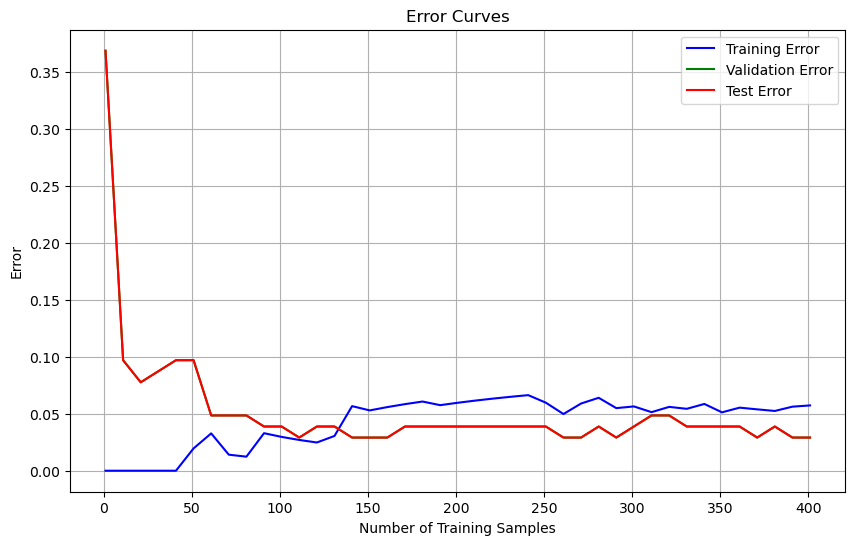

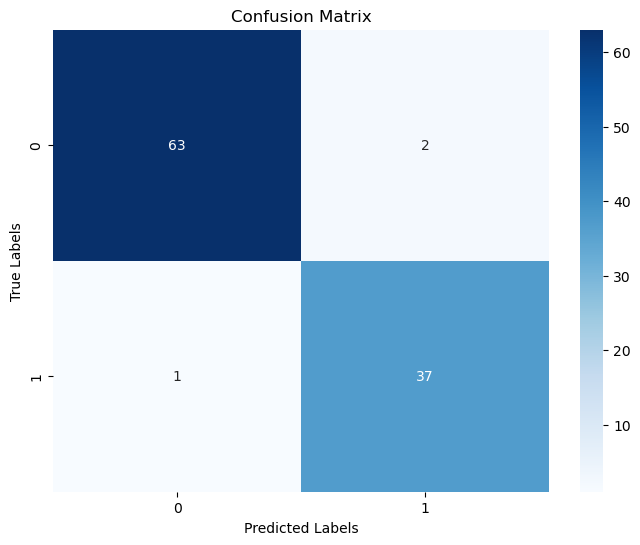


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.95      0.97      0.96        38

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103

Accuracy of Naive Bayes Classifier: 0.970873786407767


In [25]:
#implementing model with out removing highly correlated features 
# Assuming the target variable is in a column named 'target'
X = outliers_removed_dataset.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)




# Initialize lists to store training, validation, and test errors
train_errors = []
val_errors = []
test_errors = []
# Define different subset sizes
subset_sizes = np.arange(1, len(X_train) + 1, 10)

# Iterate over different subset sizes
for subset_size in subset_sizes:
    # Train the classifier on a subset of the training data
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_classifier.fit(X_subset, y_subset)
    
    # Predict on the training, validation, and test sets
    y_train_pred = naive_bayes_classifier.predict(X_subset)
    y_val_pred = naive_bayes_classifier.predict(X_test)
    y_test_pred = naive_bayes_classifier.predict(X_test)
    
    # Calculate training, validation, and test errors
    train_error = 1 - accuracy_score(y_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

# Plot error curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, label='Training Error', color='blue')
plt.plot(subset_sizes, val_errors, label='Validation Error', color='green')
plt.plot(subset_sizes, test_errors, label='Test Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix: 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)


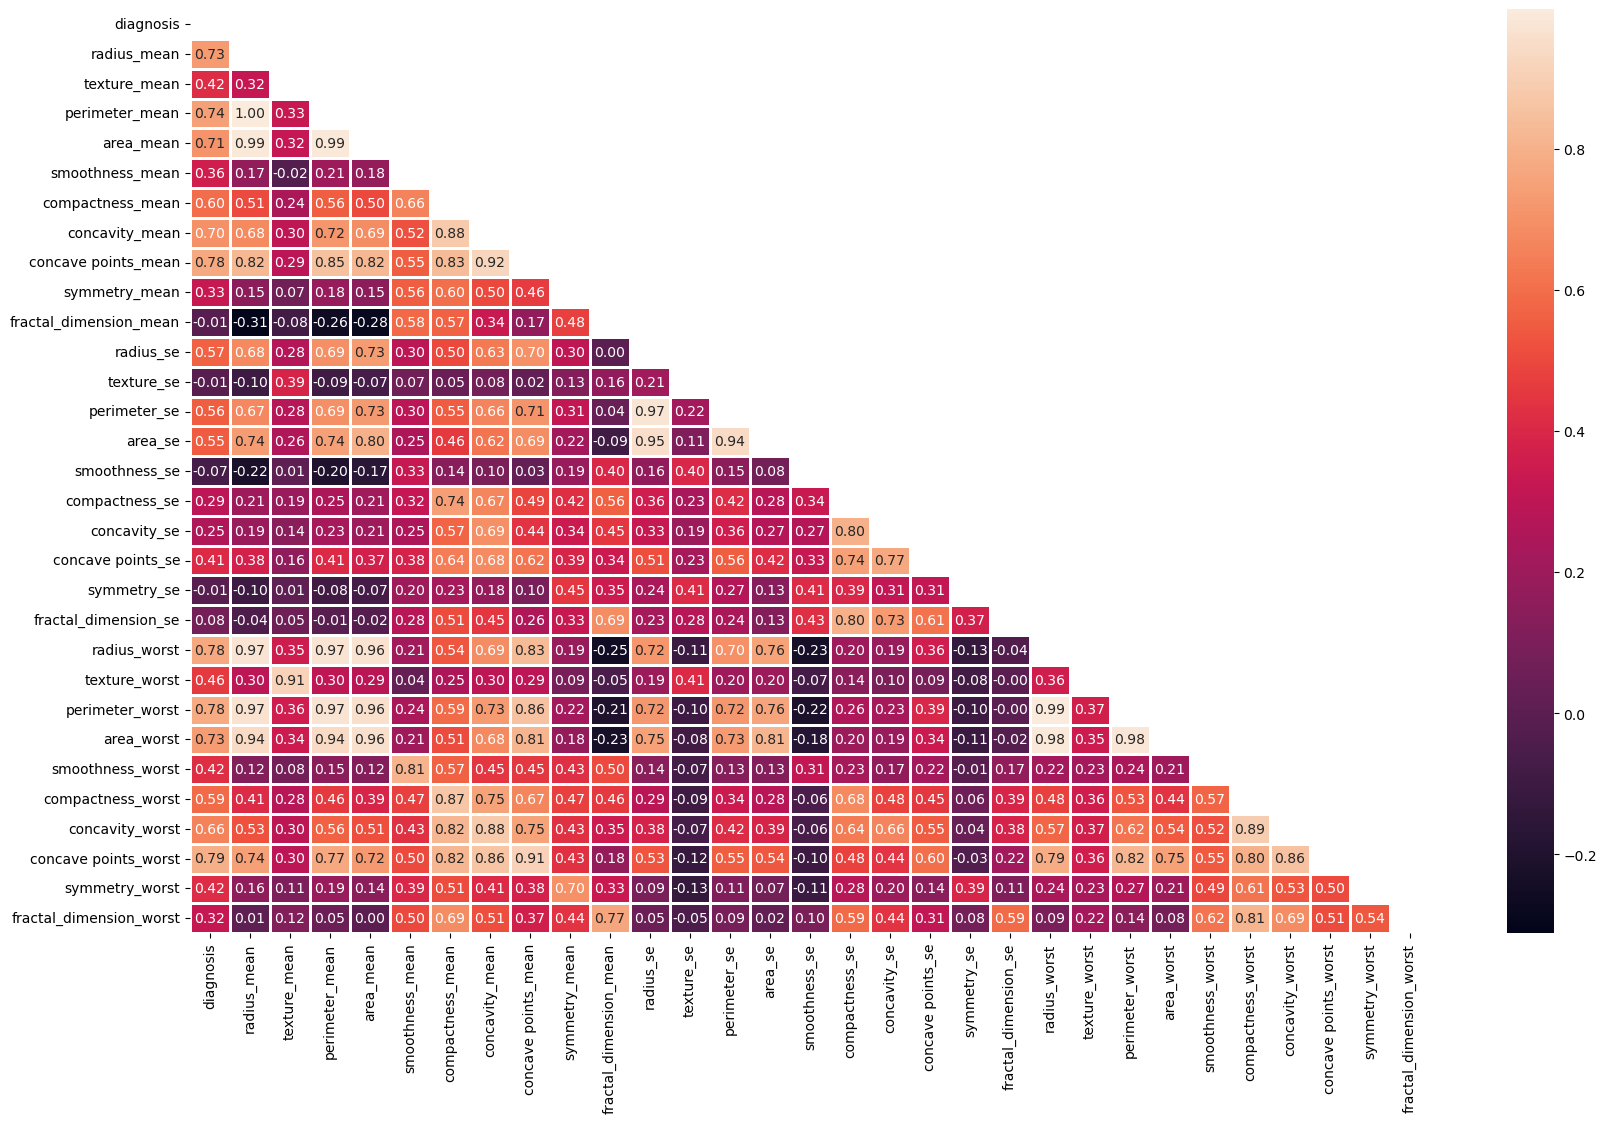

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [26]:
plt.figure(figsize = (20, 12))

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()
corr

In [27]:

# Calculate correlation matrix
corr_matrix = outliers_removed_dataset.corr().abs()

# Create a mask to exclude upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
tri_df = corr_matrix.mask(mask)

# Identify columns to drop based on correlation threshold
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Drop highly correlated columns
outliers_removed_dataset_Features_removed = outliers_removed_dataset.drop(to_drop, axis=1)

# Print the number of columns after dropping highly correlated columns
print(f"The reduced dataset has {outliers_removed_dataset_Features_removed.shape[1]} columns.")


The reduced dataset has 23 columns.


In [28]:
outliers_removed_dataset_Features_removed

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
5,1,15.70,0.12780,0.17000,0.08089,0.2087,0.07613,0.8902,27.19,0.007510,...,0.02165,0.005082,23.75,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
6,1,19.98,0.09463,0.10900,0.07400,0.1794,0.05742,0.7732,53.91,0.004314,...,0.01369,0.002179,27.66,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,23.93,0.09261,0.10210,0.04105,0.1388,0.06570,2.9040,16.97,0.008200,...,0.01488,0.004738,37.16,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,27.15,0.09929,0.11260,0.04304,0.1537,0.06171,1.4920,29.84,0.007256,...,0.02080,0.005304,33.17,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
565,1,28.25,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,99.04,0.005769,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,28.08,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,48.55,0.005903,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklea

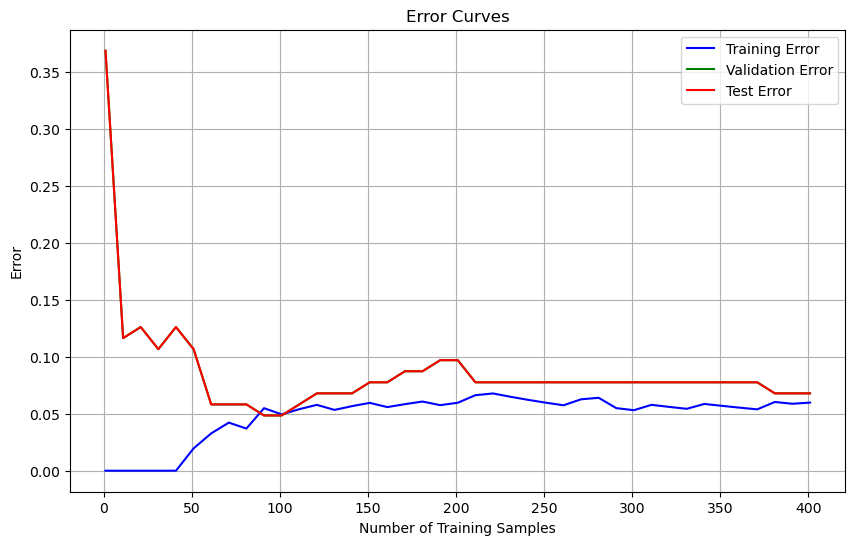

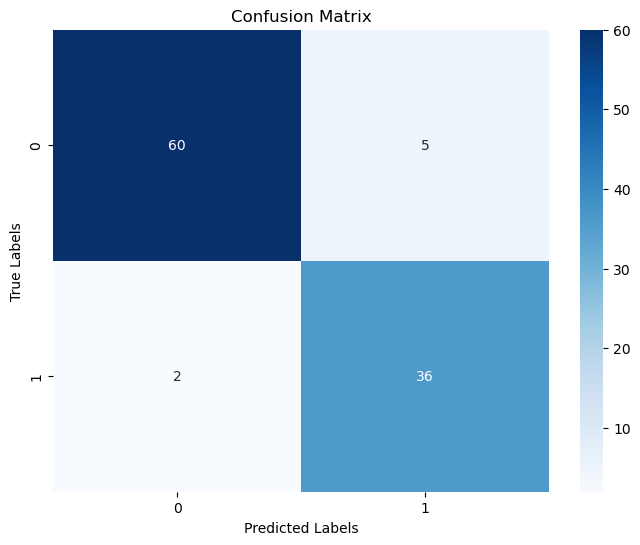


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.88      0.95      0.91        38

    accuracy                           0.93       103
   macro avg       0.92      0.94      0.93       103
weighted avg       0.93      0.93      0.93       103

Accuracy of Naive Bayes Classifier: 0.9320388349514563


In [29]:
#implementing model with removing outliers +highly correlated features 
# Assuming the target variable is in a column named 'target'
X = outliers_removed_dataset_Features_removed.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Initialize lists to store training, validation, and test errors
train_errors = []
val_errors = []
test_errors = []
# Define different subset sizes
subset_sizes = np.arange(1, len(X_train) + 1, 10)

# Iterate over different subset sizes
for subset_size in subset_sizes:
    # Train the classifier on a subset of the training data
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_classifier.fit(X_subset, y_subset)
    
    # Predict on the training, validation, and test sets
    y_train_pred = naive_bayes_classifier.predict(X_subset)
    y_val_pred = naive_bayes_classifier.predict(X_test)
    y_test_pred = naive_bayes_classifier.predict(X_test)
    
    # Calculate training, validation, and test errors
    train_error = 1 - accuracy_score(y_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

# Plot error curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, label='Training Error', color='blue')
plt.plot(subset_sizes, val_errors, label='Validation Error', color='green')
plt.plot(subset_sizes, test_errors, label='Test Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix: 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)



In [30]:
# Standardize the dataset
scaler_standard = StandardScaler()
dataset_standardized = scaler_standard.fit_transform(outliers_removed_dataset_Features_removed)

# Normalize the standardized dataset
scaler_minmax = MinMaxScaler()
dataset_standardized_normalized = scaler_minmax.fit_transform(dataset_standardized)

# Convert the scaled array back to DataFrame
dataset_standardized_normalized = pd.DataFrame(dataset_standardized_normalized, columns=outliers_removed_dataset_Features_removed.columns)
print("Standardized and Normalized Dataset:")
print(dataset_standardized_normalized.head())

Standardized and Normalized Dataset:
   diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0        1.0      0.334440         0.368361          0.224623   
1        1.0      0.478838         0.653551          0.532636   
2        1.0      0.192116         0.546862          0.429914   
3        1.0      0.248548         0.862338          0.570920   
4        1.0      0.426141         0.481817          0.339701   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0             0.380325       0.409264                0.179077    0.145590   
1             0.693225       0.572335                0.267681    0.166238   
2             0.565312       0.407360                0.236723    0.164056   
3             0.438428       0.583756                0.698425    0.206483   
4             0.401084       0.397843                0.199093    0.160901   

    area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0  0.505477       0.191281  ...     0.1

Accuracy of Naive Bayes Classifier: 0.912621359223301


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklea

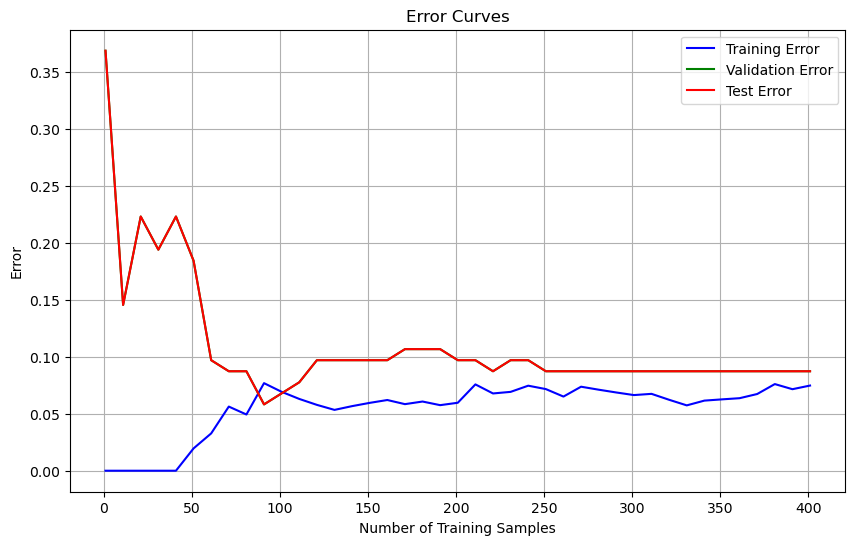

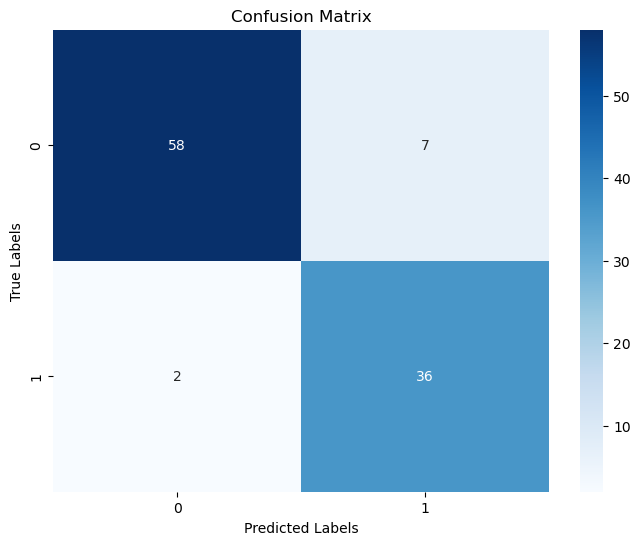


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93        65
         1.0       0.84      0.95      0.89        38

    accuracy                           0.91       103
   macro avg       0.90      0.92      0.91       103
weighted avg       0.92      0.91      0.91       103

Accuracy of Naive Bayes Classifier: 0.912621359223301


In [31]:
X = dataset_standardized_normalized.drop('diagnosis', axis=1)  # Features
y = dataset_standardized_normalized['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)
# Initialize lists to store training, validation, and test errors
train_errors = []
val_errors = []
test_errors = []
# Define different subset sizes
subset_sizes = np.arange(1, len(X_train) + 1, 10)

# Iterate over different subset sizes
for subset_size in subset_sizes:
    # Train the classifier on a subset of the training data
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_classifier.fit(X_subset, y_subset)
    
    # Predict on the training, validation, and test sets
    y_train_pred = naive_bayes_classifier.predict(X_subset)
    y_val_pred = naive_bayes_classifier.predict(X_test)
    y_test_pred = naive_bayes_classifier.predict(X_test)
    
    # Calculate training, validation, and test errors
    train_error = 1 - accuracy_score(y_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

# Plot error curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, label='Training Error', color='blue')
plt.plot(subset_sizes, val_errors, label='Validation Error', color='green')
plt.plot(subset_sizes, test_errors, label='Test Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix: 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)





In [32]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = outliers_removed_dataset.drop('diagnosis', axis=1)
y = outliers_removed_dataset['diagnosis']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the outliers_removed_dataset with the resampled data
outliers_removed_dataset_SMOTE_balanced = X_resampled.copy()
outliers_removed_dataset_SMOTE_balanced['diagnosis'] = y_resampled

# Print the updated dataset
print("Updated outliers_removed_dataset and data balanced:")
print(outliers_removed_dataset_SMOTE_balanced.head())


Updated outliers_removed_dataset and data balanced:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        20.57         17.77          132.90     1326.0          0.08474   
1        19.69         21.25          130.00     1203.0          0.10960   
2        20.29         14.34          135.10     1297.0          0.10030   
3        12.45         15.70           82.57      477.1          0.12780   
4        18.25         19.98          119.60     1040.0          0.09463   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.07864          0.0869              0.07017         0.1812   
1           0.15990          0.1974              0.12790         0.2069   
2           0.13280          0.1980              0.10430         0.1809   
3           0.17000          0.1578              0.08089         0.2087   
4           0.10900          0.1127              0.07400         0.1794   

   fractal_dimension_mean  ...  texture_

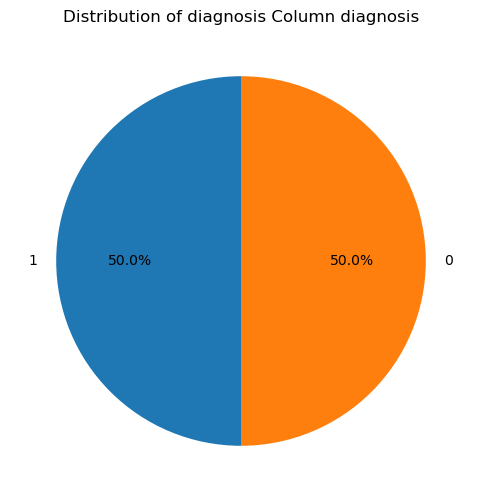

In [33]:
target = 'diagnosis'
value_counts = outliers_removed_dataset_SMOTE_balanced[target].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diagnosis Column {}'.format(target))
plt.show()
#1 represent malignant (cancerous) 0 represent non cancerous

Accuracy of Naive Bayes Classifier: 0.9338235294117647


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklea

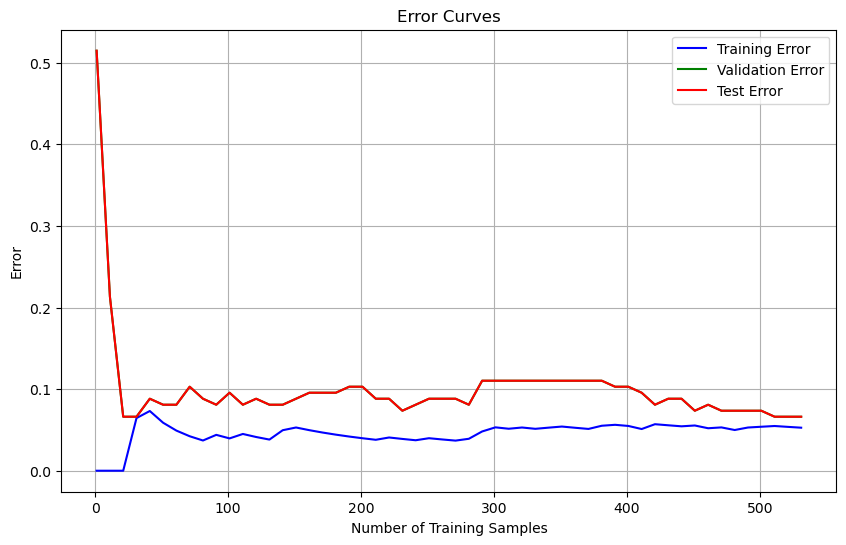

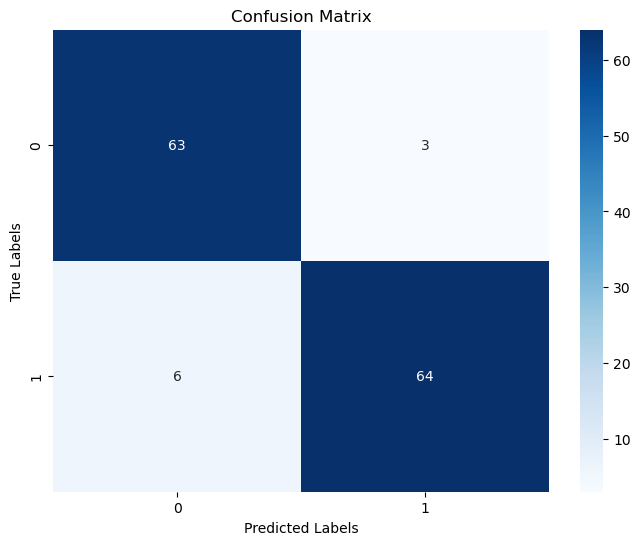


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        66
           1       0.96      0.91      0.93        70

    accuracy                           0.93       136
   macro avg       0.93      0.93      0.93       136
weighted avg       0.93      0.93      0.93       136

Accuracy of Naive Bayes Classifier: 0.9338235294117647


In [34]:
#Trying naive again with making data balanced : 
#Model with outliers removed and data balanced 
# Assuming the target variable is in a column named 'target'
X = outliers_removed_dataset_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)
# Initialize lists to store training, validation, and test errors
train_errors = []
val_errors = []
test_errors = []
# Define different subset sizes
subset_sizes = np.arange(1, len(X_train) + 1, 10)

# Iterate over different subset sizes
for subset_size in subset_sizes:
    # Train the classifier on a subset of the training data
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_classifier.fit(X_subset, y_subset)
    
    # Predict on the training, validation, and test sets
    y_train_pred = naive_bayes_classifier.predict(X_subset)
    y_val_pred = naive_bayes_classifier.predict(X_test)
    y_test_pred = naive_bayes_classifier.predict(X_test)
    
    # Calculate training, validation, and test errors
    train_error = 1 - accuracy_score(y_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

# Plot error curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, label='Training Error', color='blue')
plt.plot(subset_sizes, val_errors, label='Validation Error', color='green')
plt.plot(subset_sizes, test_errors, label='Test Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix: 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)





In [35]:

#implementing model without doing anything to data 
# Assuming the target variable is in a column named 'target'
X = dataset.drop('diagnosis', axis=1)  # Features
y = dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)

Accuracy of Naive Bayes Classifier: 0.9736842105263158


In [36]:
# Calculate correlation matrix
corr_matrix = dataset.corr().abs()

# Create a mask to exclude upper triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask to the correlation matrix
tri_df = corr_matrix.mask(mask)

# Identify columns to drop based on correlation threshold
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

# Drop highly correlated columns
Data_set_only_remove_correlated_items = dataset.drop(to_drop, axis=1)

# Print the number of columns after dropping highly correlated columns
print(f"The reduced dataset has {Data_set_only_remove_correlated_items.shape[1]} columns.")

The reduced dataset has 23 columns.


In [37]:

#implementing model with only removing correlated items  
# Assuming the target variable is in a column named 'target'
X = Data_set_only_remove_correlated_items.drop('diagnosis', axis=1)  # Features
y = Data_set_only_remove_correlated_items['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)

Accuracy of Naive Bayes Classifier: 0.9473684210526315


In [38]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = outliers_removed_dataset_Features_removed.drop('diagnosis', axis=1)
y = outliers_removed_dataset_Features_removed['diagnosis']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Update the outliers_removed_dataset with the resampled data
outliers_removed_dataset_Features_removed_SMOTE_balanced = X_resampled.copy()
outliers_removed_dataset_Features_removed_SMOTE_balanced['diagnosis'] = y_resampled

# Print the updated dataset
print("Updated outliers_removed_dataset and data balanced:")
print(outliers_removed_dataset_Features_removed_SMOTE_balanced.head())



Updated outliers_removed_dataset and data balanced:
   texture_mean  smoothness_mean  compactness_mean  concave points_mean  \
0         17.77          0.08474           0.07864              0.07017   
1         21.25          0.10960           0.15990              0.12790   
2         14.34          0.10030           0.13280              0.10430   
3         15.70          0.12780           0.17000              0.08089   
4         19.98          0.09463           0.10900              0.07400   

   symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  \
0         0.1812                 0.05667      0.7339    74.08       0.005225   
1         0.2069                 0.05999      0.7869    94.03       0.006150   
2         0.1809                 0.05883      0.7813    94.44       0.011490   
3         0.2087                 0.07613      0.8902    27.19       0.007510   
4         0.1794                 0.05742      0.7732    53.91       0.004314   

   compactness_s

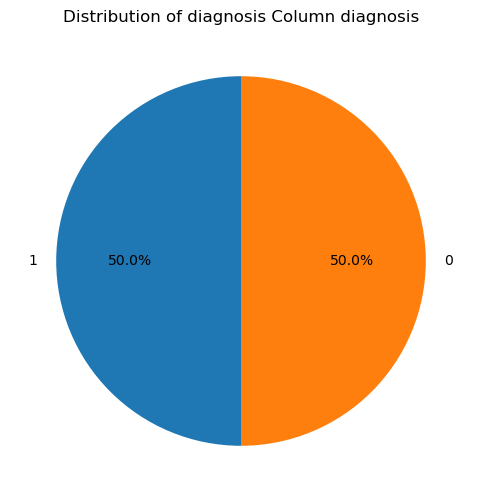

In [39]:
target = 'diagnosis'
value_counts = outliers_removed_dataset_Features_removed_SMOTE_balanced[target].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diagnosis Column {}'.format(target))
plt.show()
#1 represent malignant (cancerous) 0 represent non cancerous

Accuracy of Naive Bayes Classifier: 0.8970588235294118


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\hp\anaconda3\Lib\site-packages\sklea

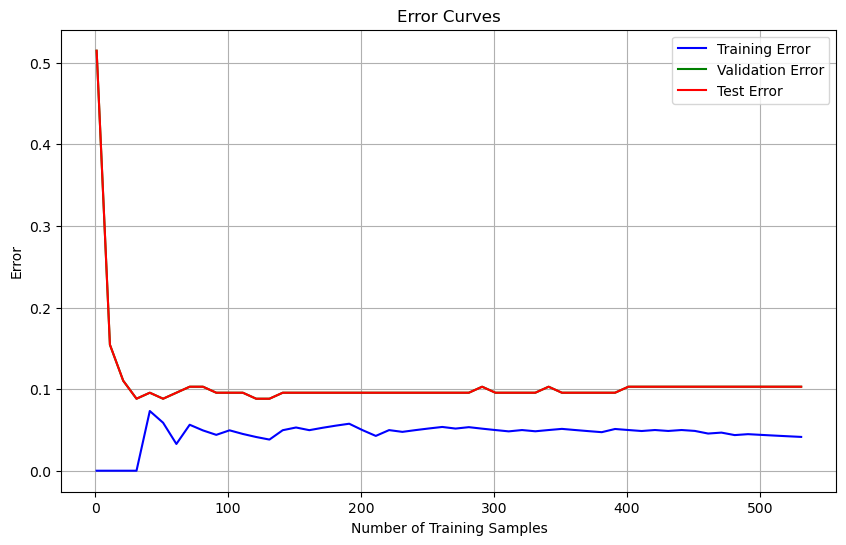

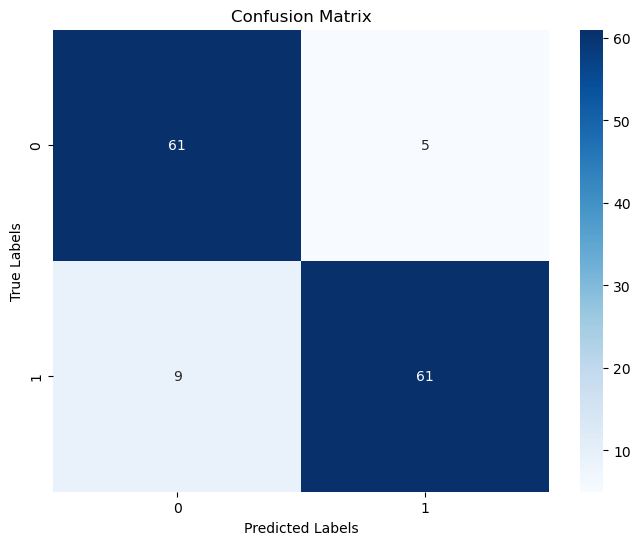


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        66
           1       0.92      0.87      0.90        70

    accuracy                           0.90       136
   macro avg       0.90      0.90      0.90       136
weighted avg       0.90      0.90      0.90       136

Accuracy of Naive Bayes Classifier: 0.8970588235294118


In [40]:
#Implementing Model with Dataset outliers removed +Feature Redution done +Data Balance Done
#Trying naive again with making data balanced : 
#Model with outliers removed and data balanced 
# Assuming the target variable is in a column named 'target'
X = outliers_removed_dataset_Features_removed_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)
# Initialize lists to store training, validation, and test errors
train_errors = []
val_errors = []
test_errors = []
# Define different subset sizes
subset_sizes = np.arange(1, len(X_train) + 1, 10)

# Iterate over different subset sizes
for subset_size in subset_sizes:
    # Train the classifier on a subset of the training data
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    naive_bayes_classifier.fit(X_subset, y_subset)
    
    # Predict on the training, validation, and test sets
    y_train_pred = naive_bayes_classifier.predict(X_subset)
    y_val_pred = naive_bayes_classifier.predict(X_test)
    y_test_pred = naive_bayes_classifier.predict(X_test)
    
    # Calculate training, validation, and test errors
    train_error = 1 - accuracy_score(y_subset, y_train_pred)
    val_error = 1 - accuracy_score(y_test, y_val_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Append errors to lists
    train_errors.append(train_error)
    val_errors.append(val_error)
    test_errors.append(test_error)

# Plot error curves
plt.figure(figsize=(10, 6))
plt.plot(subset_sizes, train_errors, label='Training Error', color='blue')
plt.plot(subset_sizes, val_errors, label='Validation Error', color='green')
plt.plot(subset_sizes, test_errors, label='Test Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()
plt.grid(True)
plt.show()


#confusion matrix: 
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of Naive Bayes Classifier:", accuracy)






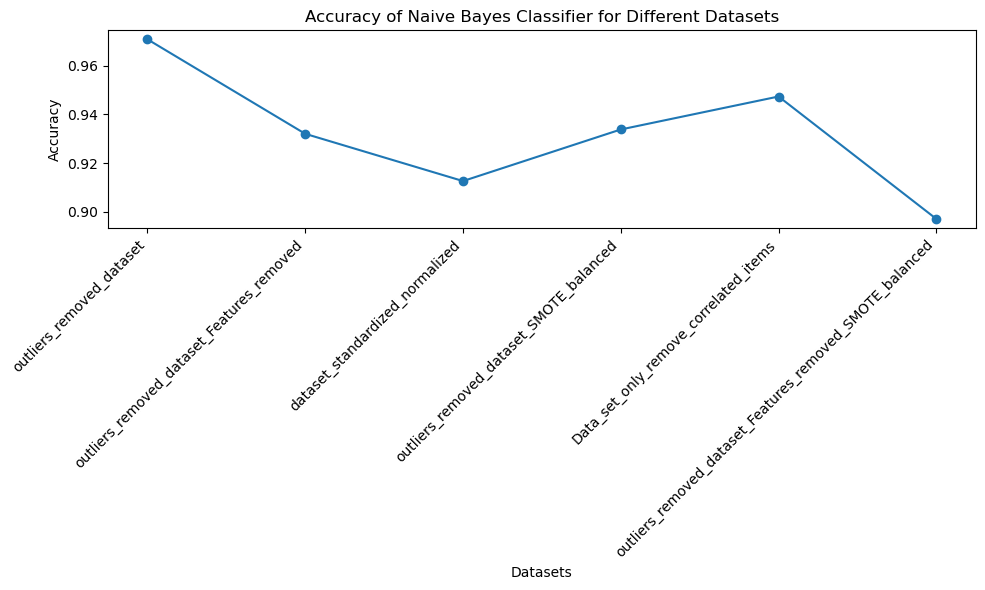

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define function to train Naive Bayes classifier and return accuracy
def get_accuracy(X, y):
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize Naive Bayes classifier
    naive_bayes_classifier = GaussianNB()
    
    # Train classifier
    naive_bayes_classifier.fit(X_train, y_train)
    
    # Calculate accuracy
    accuracy = naive_bayes_classifier.score(X_test, y_test)
    
    return accuracy

# Define datasets
datasets = {
    "outliers_removed_dataset": outliers_removed_dataset,
    "outliers_removed_dataset_Features_removed": outliers_removed_dataset_Features_removed,
    "dataset_standardized_normalized": dataset_standardized_normalized,
    "outliers_removed_dataset_SMOTE_balanced": outliers_removed_dataset_SMOTE_balanced,
    "outliers_removed_dataset_SMOTE_balanced": outliers_removed_dataset_SMOTE_balanced,
    "Data_set_only_remove_correlated_items": Data_set_only_remove_correlated_items,
    "outliers_removed_dataset_Features_removed_SMOTE_balanced": outliers_removed_dataset_Features_removed_SMOTE_balanced
}

# Calculate accuracy for each dataset
accuracies = {}
for name, data in datasets.items():
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    accuracies[name] = get_accuracy(X, y)

# Plot curve
plt.figure(figsize=(10, 6))
plt.plot(accuracies.keys(), accuracies.values(), marker='o', linestyle='-')
plt.title('Accuracy of Naive Bayes Classifier for Different Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.pipeline import Pipeline
#implementing model with out removing highly correlated features 
# Assuming the target variable is in a column named 'target'
X = outliers_removed_dataset.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Define the pipeline
operations = [('scaler', StandardScaler()), ('nb', GaussianNB())]
pipe_nb = Pipeline(steps=operations)

# Define the parameter grid
param_grid_nb = {
    'nb__var_smoothing': np.logspace(0,-9, num=100)
}

# Perform grid search
grid_search_nb = GridSearchCV(pipe_nb, param_grid_nb, cv=5, scoring='neg_mean_squared_error')
grid_search_nb.fit(X_train, y_train)

# Get the best parameters
best_params_nb = grid_search_nb.best_params_

# Predict using the best model
y_pred_nb_best = grid_search_nb.predict(X_test)

# Evaluate the best model
accuracy_nb_best = accuracy_score(y_test, y_pred_nb_best)
print(f"Best parameters: {best_params_nb}")


Best parameters: {'nb__var_smoothing': 0.533669923120631}


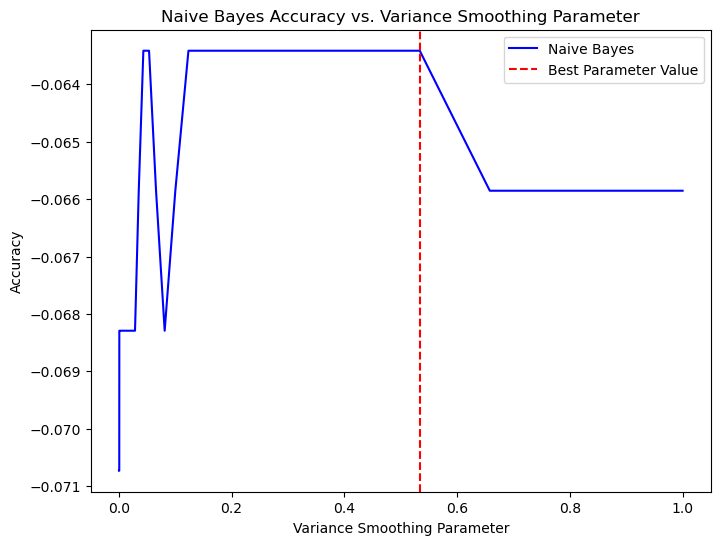

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(param_grid_nb['nb__var_smoothing'], grid_search_nb.cv_results_['mean_test_score'], color='blue', label='Naive Bayes')
plt.axvline(x=best_params_nb['nb__var_smoothing'], color='red', linestyle='--', label='Best Parameter Value')
plt.xlabel('Variance Smoothing Parameter')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy vs. Variance Smoothing Parameter')
plt.legend()
plt.show()

In [44]:
X = outliers_removed_dataset.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
var_smoothing_value = 0.533669923120631

# Initialize the Gaussian Naive Bayes classifier with specified var_smoothing
naive_bayes_classifier = GaussianNB(var_smoothing=var_smoothing_value)

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test)
# Set the value for var_smoothing

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes Classifier:", accuracy)


Accuracy of Naive Bayes Classifier: 0.8446601941747572


In [45]:
###################-------> KNN Model <---------#####################################

Fitting 5 folds for each of 39 candidates, totalling 195 fits
Fitting 5 folds for each of 39 candidates, totalling 195 fits
Confusion Matrix:
[[64  1]
 [ 6 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.97      0.84      0.90        38

    accuracy                           0.93       103
   macro avg       0.94      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



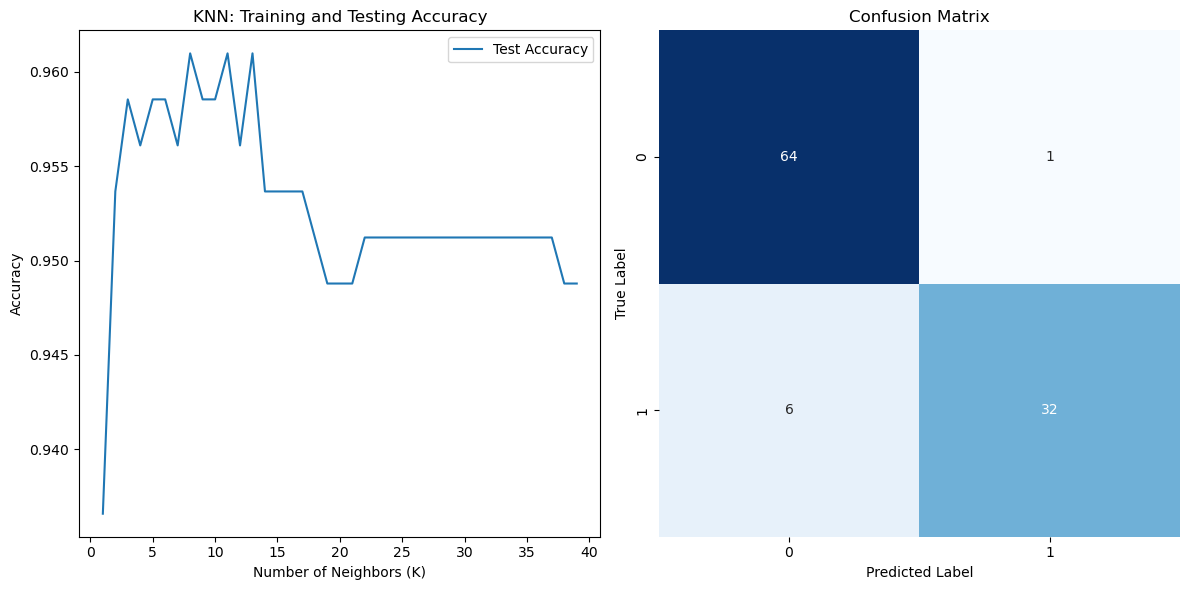

In [46]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(1, 40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [47]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 8 with an accuracy of 0.9610.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Confusion Matrix:
[[64  1]
 [ 6 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.97      0.84      0.90        38

    accuracy                           0.93       103
   macro avg       0.94      0.91      0.92       103
weighted avg       0.93      0.93      0.93       103



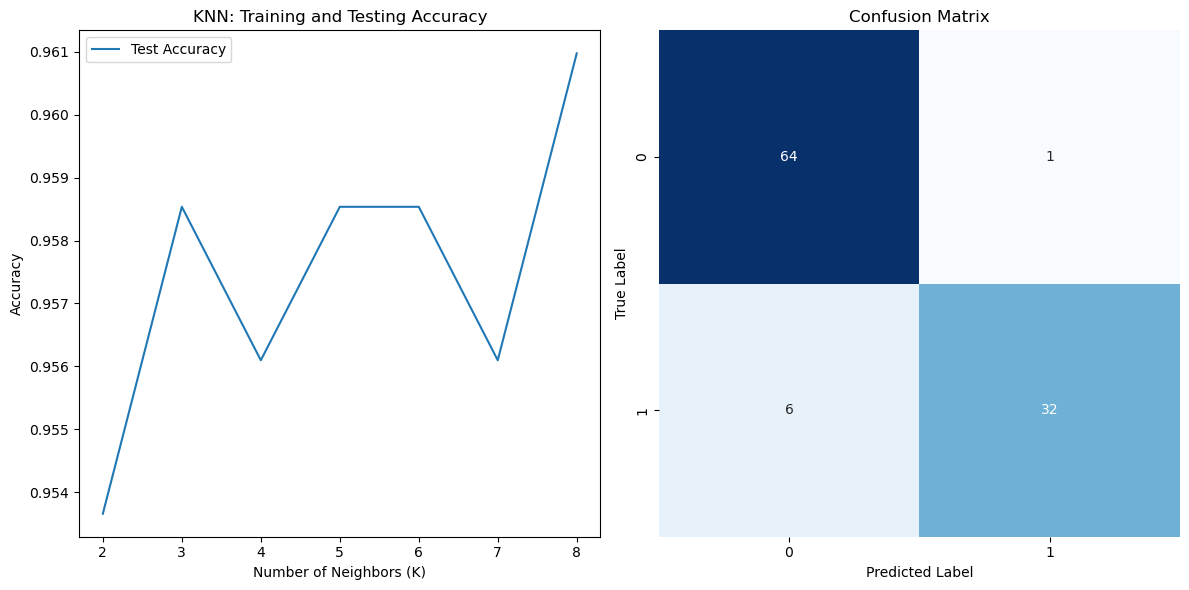

In [48]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 9)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Accuracy: 0.941747572815534
Confusion Matrix:
[[63  2]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        65
           1       0.94      0.89      0.92        38

    accuracy                           0.94       103
   macro avg       0.94      0.93      0.94       103
weighted avg       0.94      0.94      0.94       103



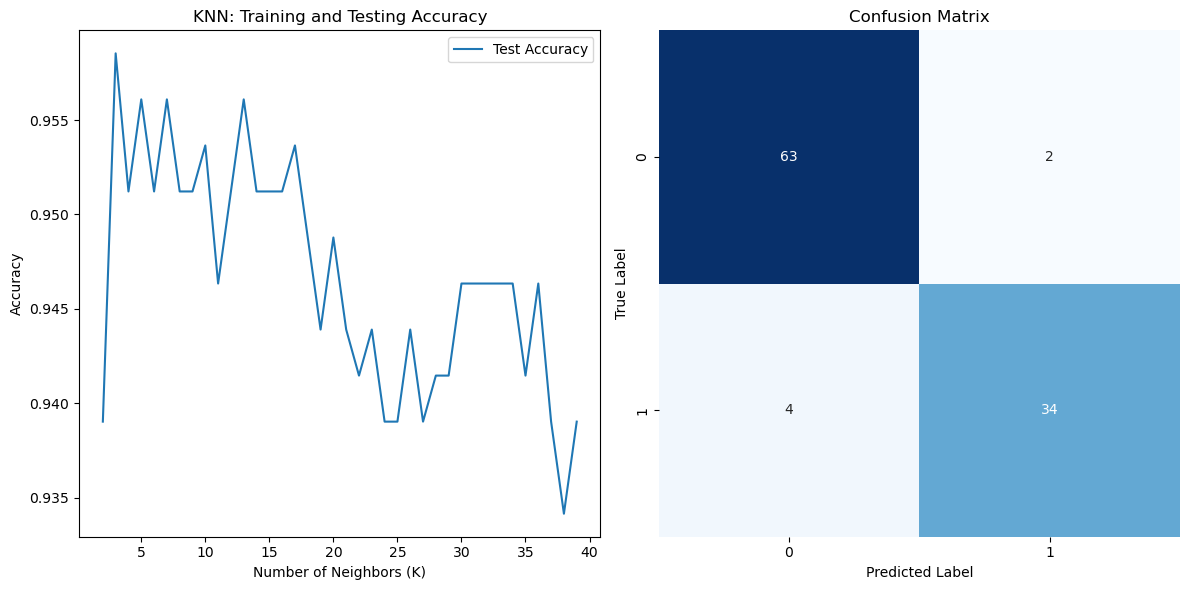

In [49]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_Features_removed.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [50]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 3 with an accuracy of 0.9585.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Accuracy: 0.941747572815534
Confusion Matrix:
[[63  2]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        65
           1       0.94      0.89      0.92        38

    accuracy                           0.94       103
   macro avg       0.94      0.93      0.94       103
weighted avg       0.94      0.94      0.94       103



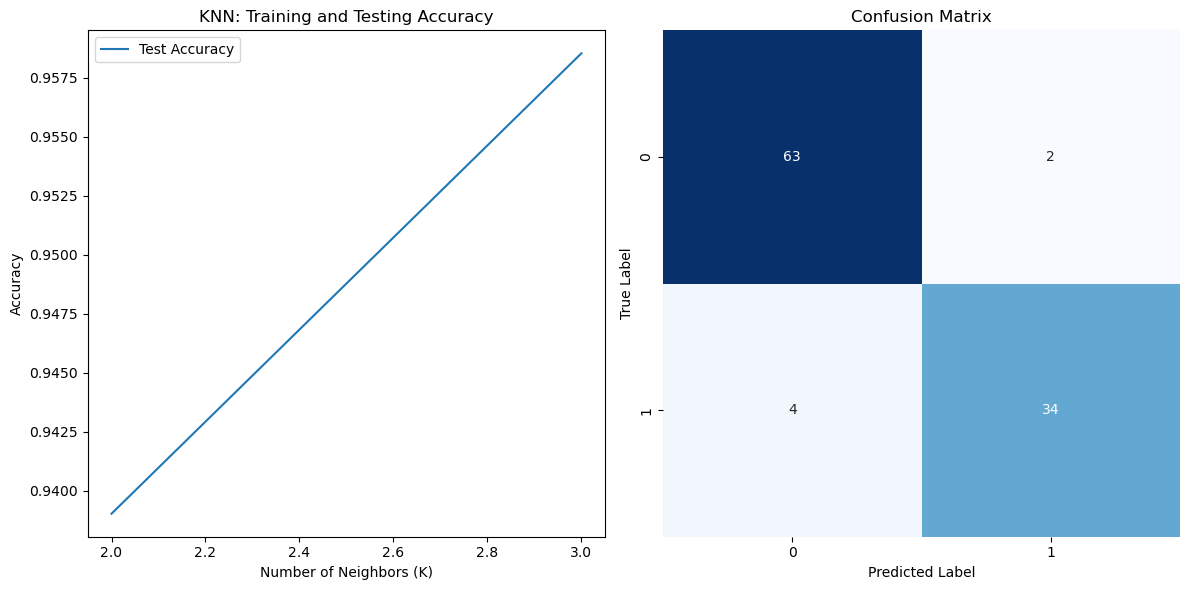

In [51]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_Features_removed.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 4)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Accuracy: 0.941747572815534
Confusion Matrix:
[[63  2]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        65
         1.0       0.94      0.89      0.92        38

    accuracy                           0.94       103
   macro avg       0.94      0.93      0.94       103
weighted avg       0.94      0.94      0.94       103



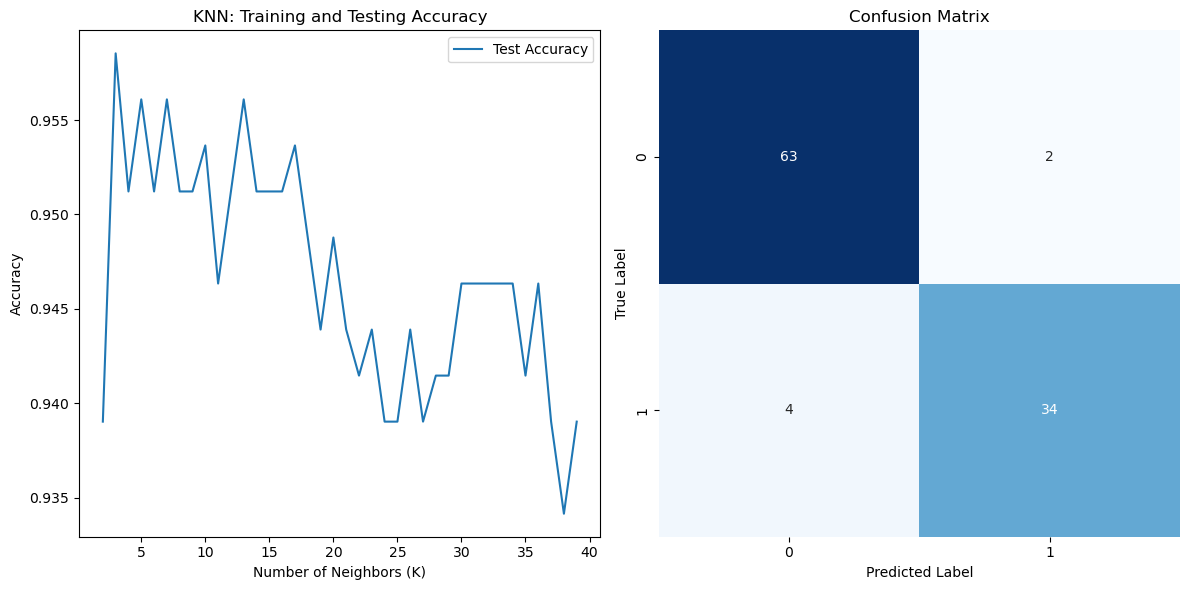

In [52]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = dataset_standardized_normalized.drop('diagnosis', axis=1)  # Features
y = dataset_standardized_normalized['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [53]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 3 with an accuracy of 0.9585.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Confusion Matrix:
[[63  2]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        65
         1.0       0.94      0.89      0.92        38

    accuracy                           0.94       103
   macro avg       0.94      0.93      0.94       103
weighted avg       0.94      0.94      0.94       103



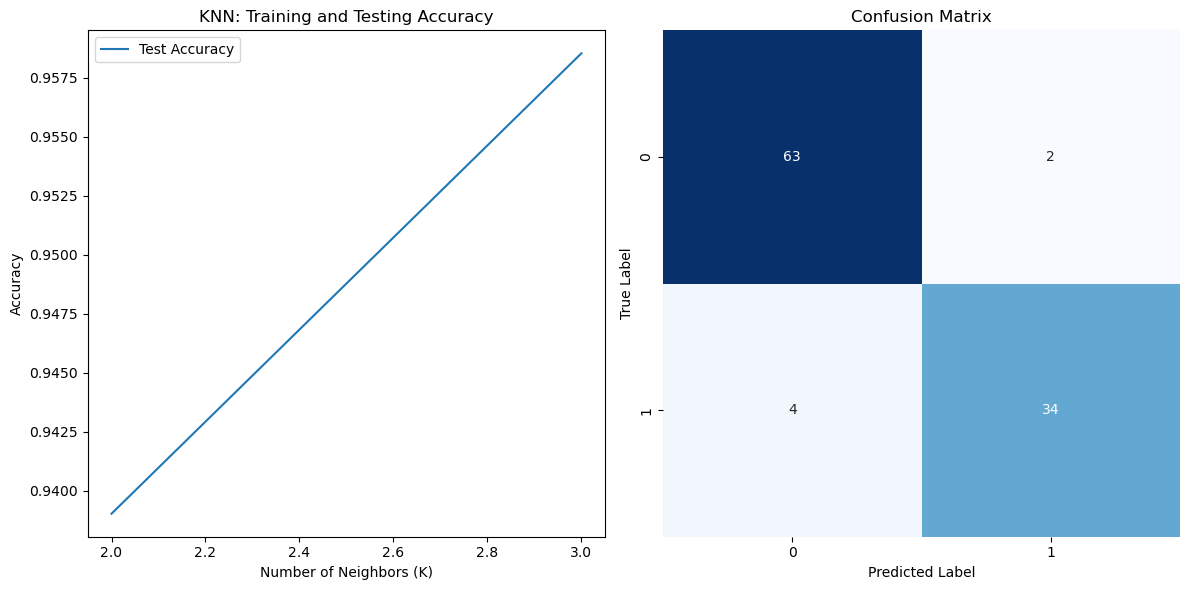

In [54]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = dataset_standardized_normalized.drop('diagnosis', axis=1)  # Features
y = dataset_standardized_normalized['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 4)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Accuracy: 0.9411764705882353
Confusion Matrix:
[[64  2]
 [ 6 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.97      0.91      0.94        70

    accuracy                           0.94       136
   macro avg       0.94      0.94      0.94       136
weighted avg       0.94      0.94      0.94       136



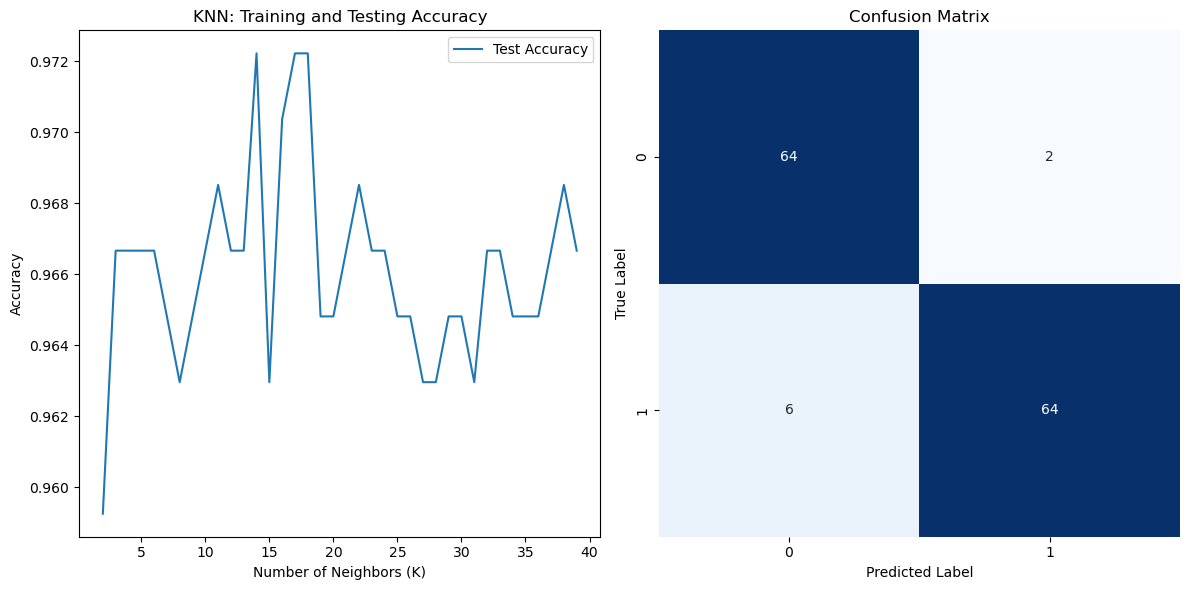

In [55]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [56]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 17 with an accuracy of 0.9722.


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy: 0.9411764705882353
Confusion Matrix:
[[64  2]
 [ 6 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.97      0.91      0.94        70

    accuracy                           0.94       136
   macro avg       0.94      0.94      0.94       136
weighted avg       0.94      0.94      0.94       136



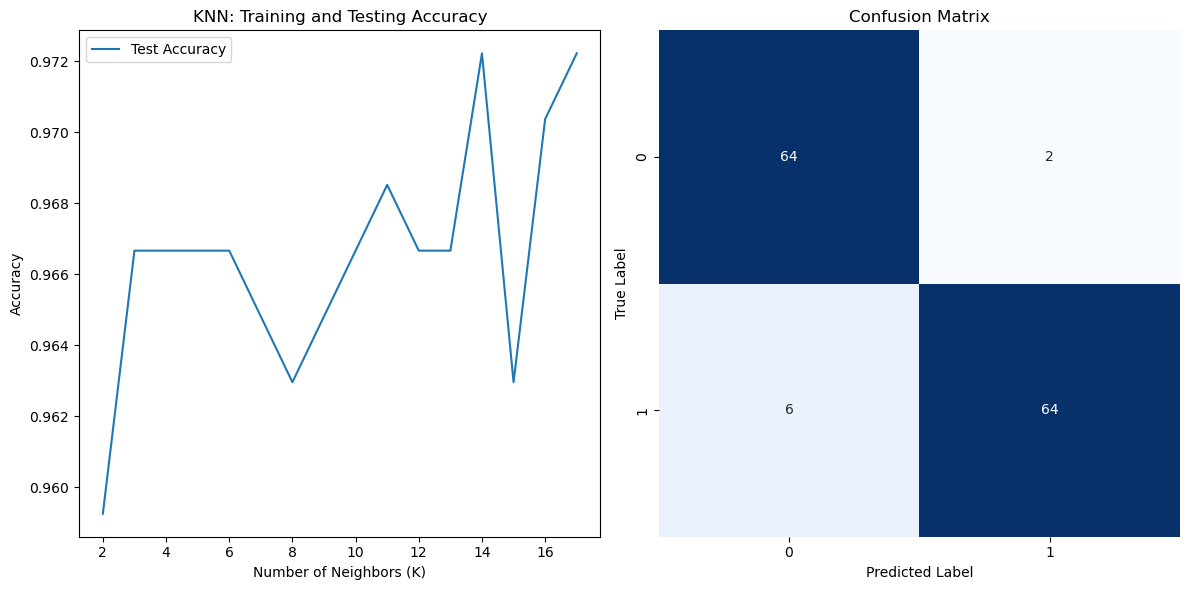

In [57]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 18)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Accuracy: 0.9385964912280702
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



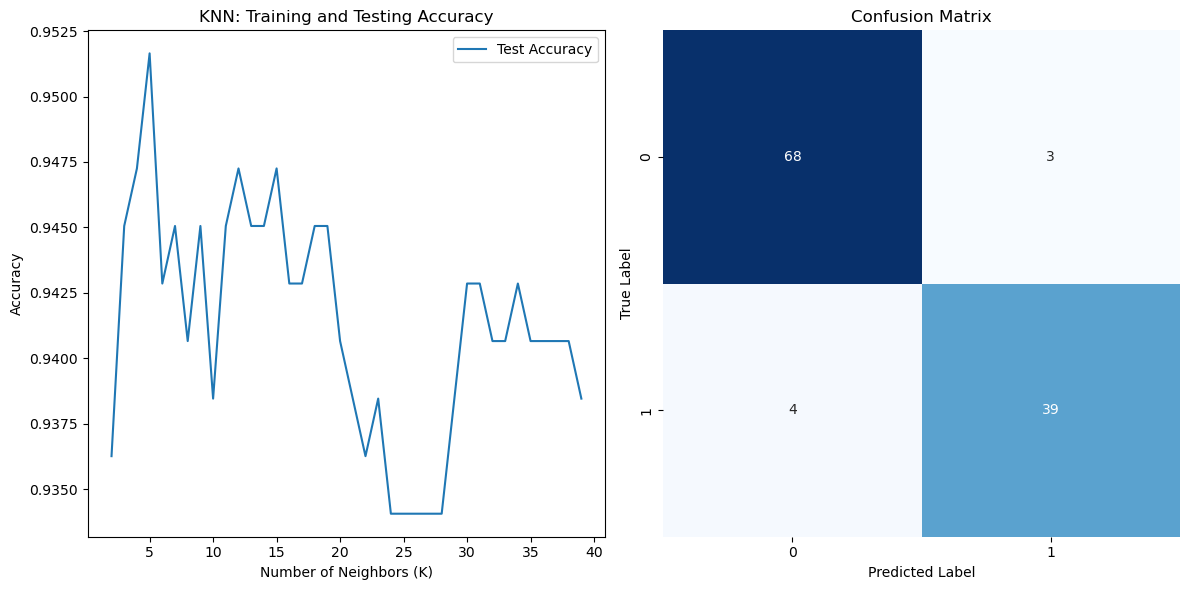

In [58]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = Data_set_only_remove_correlated_items.drop('diagnosis', axis=1)  # Features
y = Data_set_only_remove_correlated_items['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2, 40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [59]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 5 with an accuracy of 0.9516.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Confusion Matrix:
[[68  3]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



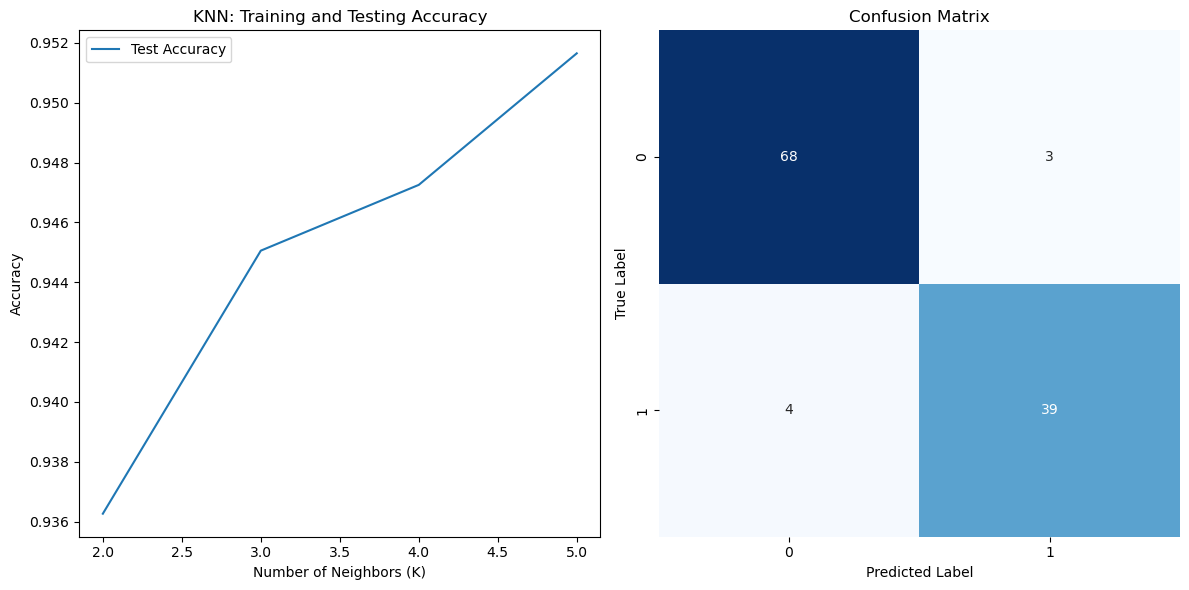

In [60]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = Data_set_only_remove_correlated_items.drop('diagnosis', axis=1)  # Features
y = Data_set_only_remove_correlated_items['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2,6)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 38 candidates, totalling 190 fits
Fitting 5 folds for each of 38 candidates, totalling 190 fits
Confusion Matrix:
[[62  4]
 [ 7 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        66
           1       0.94      0.90      0.92        70

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136



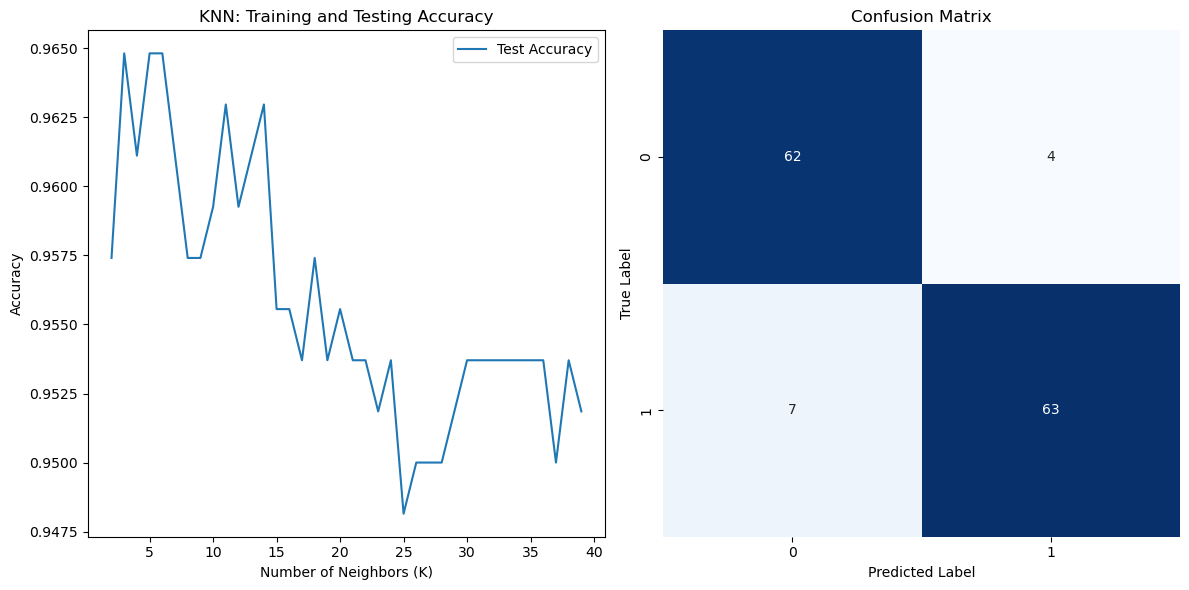

In [61]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_Features_removed_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2,40)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [62]:
# Extracting results from the grid search
k_values = knn_grid.cv_results_["param_knn__n_neighbors"]
mean_test_scores = knn_grid.cv_results_["mean_test_score"]

# Finding the index of the best K value
best_k_index = mean_test_scores.argmax()

# Best K value
best_k = k_values[best_k_index]
best_accuracy = mean_test_scores[best_k_index]

print(f"The best value of K is {best_k} with an accuracy of {best_accuracy:.4f}.")


The best value of K is 3 with an accuracy of 0.9648.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Confusion Matrix:
[[62  4]
 [ 7 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        66
           1       0.94      0.90      0.92        70

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136



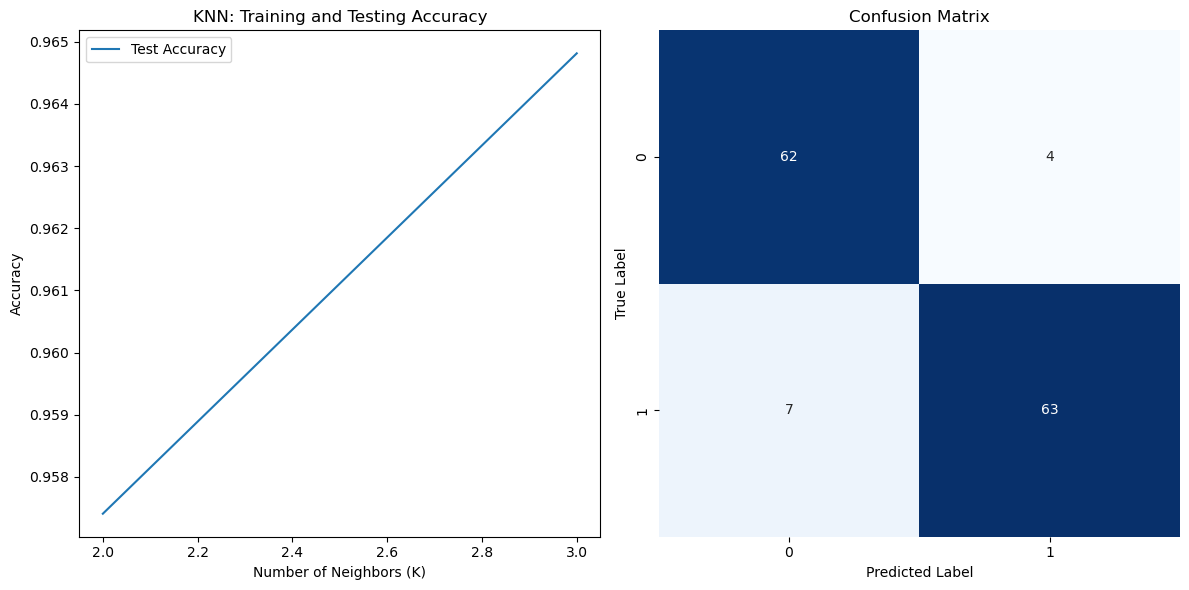

In [63]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = outliers_removed_dataset_Features_removed_SMOTE_balanced.drop('diagnosis', axis=1)  # Features
y = outliers_removed_dataset_Features_removed_SMOTE_balanced['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)

knn_params = {"knn__n_neighbors": range(2,4)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_



# Fit the model
knn_grid.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_grid.predict(X_test)



# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.plot(knn_grid.cv_results_["param_knn__n_neighbors"], knn_grid.cv_results_["mean_test_score"], label="Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training and Testing Accuracy")
plt.legend()

# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [64]:
#From this we get that using dataset : outliers_removed_dataset_SMOTE_balanced and this dataset we removed outliers and Did balancing to diagnosis class 
# with k=17 using KNN we gebt best accuracy  with an accuracy of 0.9722.

In [65]:
#Phase 2 MLP :


In [72]:

from sklearn.neural_network import MLPClassifier


from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

# Load the dataset (replace load_iris with your dataset loading method)
X = outliers_removed_dataset.drop(columns=['diagnosis'])  # assuming 'target' is the name of the target variable column
y = outliers_removed_dataset['diagnosis']



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid including additional hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
  
}

# Instantiate the MLP classifier
mlp = MLPClassifier()

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.89      0.94        38

    accuracy                           0.96       103
   macro avg       0.97      0.95      0.96       103
weighted avg       0.96      0.96      0.96       103

Test Accuracy: 0.9611650485436893


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Confusion Matrix:
[[65  0]
 [ 4 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.89      0.94        38

    accuracy                           0.96       103
   macro avg       0.97      0.95      0.96       103
weighted avg       0.96      0.96      0.96       103

Train Error: 0.014634146341463428


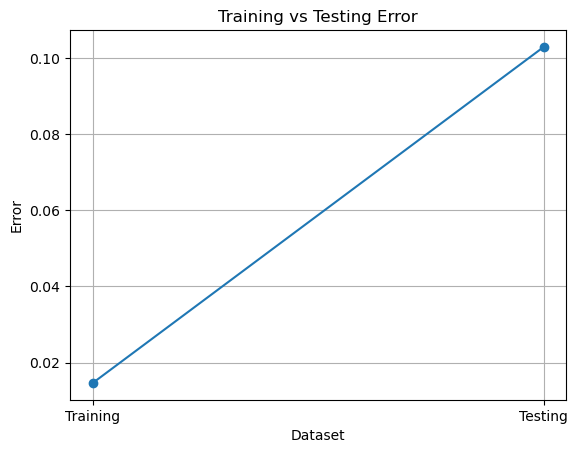

In [75]:
print("Best Parameters:", grid_search.best_params_)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate train error
y_train_pred = best_model.predict(X_train)
train_error = 1 - best_model.score(X_train, y_train)
print("Train Error:", train_error)
plt.plot([0, 1], [train_error, test_error], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Error')
plt.title('Training vs Testing Error')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.grid()
plt.show()


In [85]:

from sklearn.neural_network import MLPClassifier


from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

# Load the dataset (replace load_iris with your dataset loading method)
X = dataset_standardized_normalized.drop(columns=['diagnosis'])  # assuming 'target' is the name of the target variable column
y = outliers_removed_dataset['diagnosis']



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid including additional hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
  
}

# Instantiate the MLP classifier
mlp = MLPClassifier()

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.97      0.97      0.97        38

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

Test Accuracy: 0.9805825242718447


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30, 30), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Train Error: 0.007317073170731714
Test Error: 0.01941747572815533


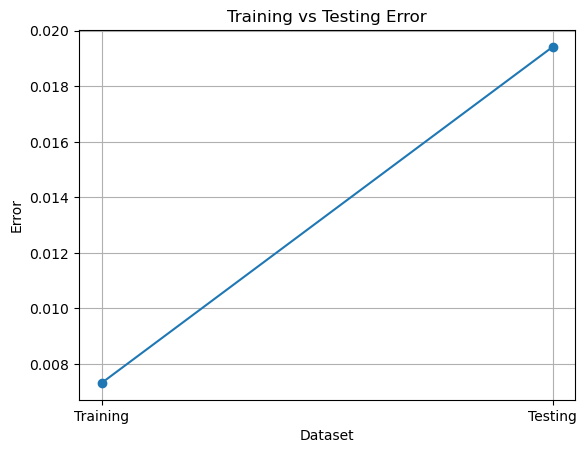

In [76]:
X = outliers_removed_dataset_Features_removed.drop(columns=['diagnosis'])  # Assuming 'target' is the name of the target variable column
y = outliers_removed_dataset_Features_removed['diagnosis']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid including additional hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (30,30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Instantiate the MLP classifier
mlp = MLPClassifier()
# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
# Evaluate the best model
best_model = grid_search.best_estimator_
# Calculate train error
train_error = 1 - best_model.score(X_train, y_train)
print("Train Error:", train_error)

# Calculate test error
test_error = 1 - best_model.score(X_test, y_test)
print("Test Error:", test_error)

# Plot training vs testing error
plt.plot([0, 1], [train_error, test_error], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Error')
plt.title('Training vs Testing Error')
plt.xticks([0, 1], ['Training', 'Testing'])
plt.grid()
plt.show()

In [79]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.97      0.97      0.97        38

    accuracy                           0.98       103
   macro avg       0.98      0.98      0.98       103
weighted avg       0.98      0.98      0.98       103

Test Accuracy: 0.9805825242718447


In [82]:

X = outliers_removed_dataset_SMOTE_balanced.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target variable
y = outliers_removed_dataset_SMOTE_balanced['diagnosis']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid (assuming you want to use the same hyperparameters)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Instantiate the MLP classifier
mlp = MLPClassifier()

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set (optional)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

print("Best Parameters:", grid_search.best_params_)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Train Error (optional)
y_train_pred = best_model.predict(X_train)
train_error = 1 - best_model.score(X_train, y_train)
print("Train Error:", train_error)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        66
           1       0.95      0.89      0.92        70

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136

Test Accuracy: 0.9191176470588235
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Confusion Matrix:
[[63  3]
 [ 8 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        66
           1       0.95      0.89      0.92        70

    accuracy                           0.92       136
   macro avg       0.92      0.92      0.92       136
weighted avg       0.92      0.92      0.92       136

Train Error: 0.05740740740740746


In [83]:

X = Data_set_only_remove_correlated_items.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target variable
y = Data_set_only_remove_correlated_items['diagnosis']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid (assuming you want to use the same hyperparameters)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Instantiate the MLP classifier
mlp = MLPClassifier()

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set (optional)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

print("Best Parameters:", grid_search.best_params_)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Train Error (optional)
y_train_pred = best_model.predict(X_train)
train_error = 1 - best_model.score(X_train, y_train)
print("Train Error:", train_error)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Test Accuracy: 0.9385964912280702
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'solver': 'adam'}
Confusion Matrix:
[[71  0]
 [ 7 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Train Error: 0.09230769230769231


In [84]:


X = outliers_removed_dataset_Features_removed_SMOTE_balanced.drop(columns=['diagnosis'])  # Assuming 'diagnosis' is the target variable
y = outliers_removed_dataset_Features_removed_SMOTE_balanced['diagnosis']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid (assuming you want to use the same hyperparameters)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Instantiate the MLP classifier
mlp = MLPClassifier()

# Perform grid search
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Test the model on a separate test set (optional)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

print("Best Parameters:", grid_search.best_params_)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Train Error (optional)
y_train_pred = best_model.predict(X_train)
train_error = 1 - best_model.score(X_train, y_train)
print("Train Error:", train_error)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        66
           1       0.98      0.84      0.91        70

    accuracy                           0.91       136
   macro avg       0.92      0.91      0.91       136
weighted avg       0.92      0.91      0.91       136

Test Accuracy: 0.9117647058823529
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'solver': 'adam'}
Confusion Matrix:
[[65  1]
 [11 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        66
           1       0.98      0.84      0.91        70

    accuracy                           0.91       136
   macro avg       0.92      0.91      0.91       136
weighted avg       0.92      0.91      0.91       136

Train Error: 0.06851851851851853
